# РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

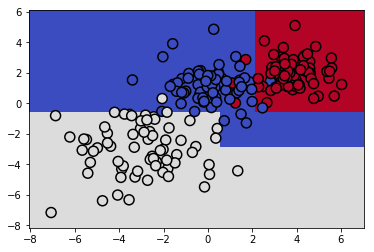

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

# ЗАДАНИЕ НА РЕАЛЬНОМ ДАТАСЕТЕ

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Более подробную информацию про датасет, а также сам датасет можно найти здесь. Также можете его скачать напрямую по этой ссылке.

Параметры решающего дерева, которые понадобятся для решения задачи:

 - **max_depth** — максимальная глубина дерева.
 - **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
 - **min_samples_leaf** — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

In [7]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [5]:
data = pd.read_csv('../data/bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за 3, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. 

Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [33]:
X = data.drop(columns=['Class']).values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

model = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

round(f1_score(y_test, y_pred), 3)

0.866

Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. К какому классу она относится?

In [35]:
X_test_new = np.array([[2.04378, -0.38422, 1.437292, 0.76421]])

y_pred = model.predict(X_test_new)
y_pred

array([0])

Здесь приведена визуализация того, как одно решающее дерево разделяет выборку, состоящую из трёх классов.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно переобученным. Пример такого дерева:

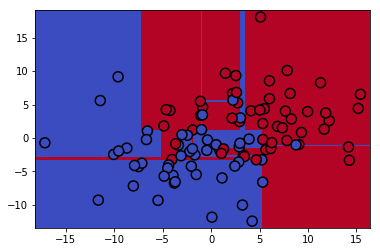

In [36]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

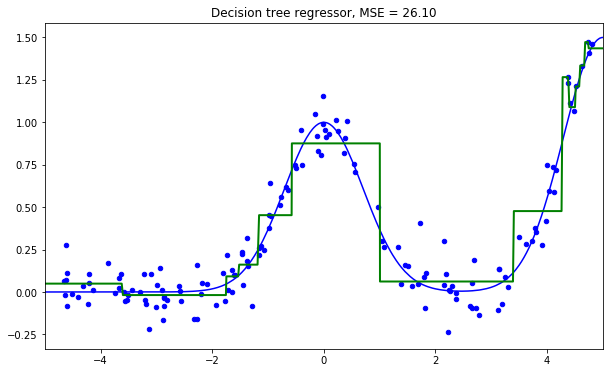

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

# БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

 - Задать порог по мере неопределённости: $I(S) < 0$
 - Задать порог по размеру узла: $|S|\le n$
 - Задать порог на глубину: $Depth(T) = n$
 - Задать порог на размер потомков $|S_L|\le n_1$ & $|S_R|\le n_2$, 

здесь $S$ — это узел дерева, $T$ — дерево, $|S|$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $S$.

# ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива. Датасет лежит здесь.

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева. Вычислите RMSE, округлите до двух знаков после точки-разделителя.

In [40]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
data = pd.read_csv('../data/petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [48]:
RANDOM_SEED = 42

X = data.drop(columns=['Petrol_Consumption']).values
y = data['Petrol_Consumption'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

model = DecisionTreeRegressor(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)

round(RMSE**0.5, 2)

87.97

In [45]:
DecisionTreeRegressor?

In [47]:
model.get_depth()

11

# ПОСТРОЕНИЕ ДЕРЕВА

В случае CART-деревьев, которые рассматриваются в этом уроке, дерево строится жадным способом. Это значит, что на каждом этапе построения очередных двух потомков находится наилучшее с точки зрения критерия разделение выборки. В алгоритме, который мы описали ранее, имели место вызовы функции best_split(X,y), сейчас мы разберём, что есть лучшее разбиение.

Формально это записывается следующим образом:

Пусть в вершину $m$ попало множество $X_m$ объектов из обучающей выборки. Параметры в условии $[x^j \leq t]$ будут выбраны так, чтобы минимизировать данный критерий ошибки $Q(X_m, j, t)$, зависящий от этих параметров: $$Q(X_m, j, t) → \min_{j,\, t}{},$$
где $j$ — номер признака, $t$ — пороговое значение признака. Параметры $j$ и $t$ можно подбирать перебором. Действительно, признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения. Можно показать, что таких значений параметра столько, сколько различных значений признака $x^j$ на обучающей выборке.

После того, как параметры были выбраны, множество $X_m$ объектов из обучающей выборки разбивается на два множества
$$X_{\ell} = \{x \in X_m \, | \, [x^j \leq t]\},$$
$$X_r = \{x \in X_m \, | \, [x^j > t]\},$$ 
каждое из которых соответствует своей дочерней вершине.

Предложенную процедуру можно продолжить для каждой из дочерних вершин: в этом случае дерево будет все больше и больше углубляться. Такой процесс рано или поздно должен остановиться, и очередная дочерняя вершина будет объявлена листком, а не разделена пополам. Этот момент определяется критерием остановки. Одним из тех, которые мы описали в пункте о борьбе с переобучением.

После построения листового узла требуется задать прогноз, который будет присвоен всем объектам, которые на этапе тестирования попадут в этот лист. В случае классификации оптимально возвращать тот класс, который наиболее популярен среди объектов в $X_m$:
$$a_m = argmax_{y \in \mathbb{Y}}\sum_{i\in X_m}[y_i = y],$$
здесь $a_m$ — это прогноз в листе, один из возможных. Если требуется возвращать вероятность отнесения к определенным классам, то в этом случае можно указывать долю класса в листе:
$$a_{mk} = \frac{1}{|X_m|}\sum_{i\in X_m}[y_i = k],$$
здесь $a_{mk}$ — это прогноз для $k$-го класса, объект, попавший в этот лист, будет иметь распределение вероятностей по $k$ классам.

# КРИТЕРИИ ИНФОРМАТИВНОСТИ

Начнем с функционала качества. Нам необходимо оптимизировать критерий ошибки $Q(X_m, j, t)$, описанный ранее.

# ОБЩИЙ ВИД КРИТЕРИЯ ОШИБКИ

Критерий ошибки состоит из двух слагаемых, каждый из которых соответствует дочерним узлам:
$$Q(X_m, j, t) = \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) + \frac{|X_{r}|}{|X_m|}S(X_r).$$
Функция $S(x)$ называется критерием информативности, её значение уменьшается с уменьшением разброса ответов на выборке $X$.

Также стоит ввести такое понятие, как прирост информации (information gain):
$$IG(X_m, j, t) = S(X) - \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) - \frac{|X_{r}|}{|X_m|}S(X_r).$$

Это соотношение показывает, насколько изменилась информативность при данном разбиении, т.е. по значению $t$ признака $j$.

При помощи деревьев решений можно прогнозировать и количественные признаки (регрессия). В этом случае идея построения остается той же, но оптимизируется иной критерий:
$$Q(X_m, j, t) = \frac{1}{|X|} \sum\limits_{i \in X} (y_i - \frac{1}{|X|} \sum\limits_{i \in X} y_i)^2,$$
где $l$ — число объектов в листе, $y_i$ — значения целевого признака. Попросту говоря, минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

# 1. ЭНТРОПИЙНЫЙ КРИТЕРИЙ ИНФОРМАТИВНОСТИ

Энтропия Шеннона определяется для системы с возможными состояниями следующим образом:
$$S(X) = -\sum_{i=k}^{K}p_k \log_2{p_k},$$
где $p_k$ — вероятности нахождения системы в $k$-ом состоянии.

Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия (комбинаторные и теоретико-информационные), отметим, что интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. В нашем случае $K$ — это количество классов, $p_k$ — вероятность отношения объекта из $X$ к $k$-тому классу.

# ПРИМЕР

В качестве примера рассмотрим задачу сортировки группы шариков на две — жёлтого и синего цвета. Этот пример поможет нам понять, как энтропия используется для построения дерева решений.

<img src="../images/MLO_entropy_1.png" alt="Binary-cross-entropy" width="500" align="center">

а рисунке 9 синих шариков и 11 жёлтых. Если мы наудачу вытащим шарик, то он с вероятностью $p_1=\frac{9}{20}$ будет синим и с вероятностью $p_2=\frac{11}{20}$ — жёлтым.

Значит, энтропия состояния
$$S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$$

Само это значение пока ни о чём нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы — с координатой меньше либо равной 12 и больше 12.

<img src="../images/MLO_entropy_2.png" alt="Binary-cross-entropy" width="500" align="center">

В левой группе оказалось 13 шаров, из которых 8 синих и 5 жёлтых. Энтропия этой группы равна

$$S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$$

В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна
$$S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$$

Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хотя в левой и не сильно.

Поскольку энтропия — по сути, степень хаоса (или неопределённости) в системе, уменьшение энтропии называют **приростом информации**. В этом случае прирост информации (IG) при разбиении выборки по признаку $j$ (в нашем примере это признак $x$, а разделяющее правило — "$x \leq 12$") имеет следующий вид:
$$IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Получается, разделив шарики на две группы по признаку «координата меньше либо равна 12», мы уже получили более упорядоченную систему, чем вначале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

<img src="../images/MLO_entropy_3.png" alt="Binary-cross-entropy" width="500" align="center">

Для правой группы потребовалось всего одно дополнительное разбиение по признаку «координата меньше либо равна 18», для левой — ещё три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($log_2 1 = 0$), что соответствует представлению, что группа шариков одного цвета — упорядоченная.

В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом «вопросов» (или разделений), пусть даже оно и не идеально разбивает по цветам обучающую выборку.

# 2. КРИТЕРИЙ ДЖИНИ

Кроме энтропийного критерия существуют и другие. Пусть $p_k$ — доля объектов класса $k$ в выборке $X$:
$$p_k = \frac{1}{X} \sum\limits_{i \in X} [y_i = k].$$

Критерий информативности Джини формулируется в следующем виде:
$$p_k = \frac{1}{X} \sum\limits_{i \in X} [y_i = k].$$

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его оптимум достигается только в том случае, когда все объекты в относятся к одному классу.

# РИТЕРИЙ ОСТАНОВКИ (ИЛИ КРИТЕРИЙ ОСТАНОВА)

Кроме критерия информативности, необходимо рассмотреть, какие мы можем вводить ограничения на дерево. Можно устанавливать различные критерии для остановки построения дерева, например:

 - Ограничение максимальной глубины дерева.
 - Ограничение максимального количества листьев в дереве.
 - Ограничение минимального числа объектов в одном листе.
 - Ограничение, на сколько процентов минимально должен улучшаться функционал качества при новом разветвлении.

# АНСАМБЛЬ МОДЕЛЕЙ (БЭГГИНГ)

Bagging — это параллельный способ построения ансамбля. Коротко о способе построения:

 - Обучающая выборка сэмплируется $k$ раз с помощью bootstrap (выбор с возвращением).
 - На каждом сэмпле обучается отдельная базовая модель.
 - Ответы моделей усредняются (возможно, с весами).

Необходимость бэггинга может возникнуть тогда, когда вы уже нашли хорошую модель, и никак больше не можете повысить ее качество. В этом случае можно перейти к более продвинутой истории: использовать не одну модель (пусть и очень хорошую!), а ансамбли моделей. Под термином ансамбли понимается ряд продвинутых техник машинного обучения, о которых мы поговорим далее.

# БЭГГИНГ (BAGGING, BOOTSTRAP AGGREGATING)

Цель бэггинга заключается в том, чтобы создать ансамбль из нескольких моделей. Такая ансамблевая модель будет надежнее, чем составляющие ее части.

В основе бэггинга лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации выборок размера $B$ (так называемых бутстрэп-выборок) из исходного датасета размера $N$ путем случайного выбора элементов с повторениями в каждом из наблюдений $B$.

Рассмотрим идею бутстрэпа на элементарном примере.

Пусть у нас есть выборка из 12 элементов. Тогда мы можем из нее выбирать различные выборки из нового количества элементов (в данном случае из 5). При этом, если мы использовали какой-то объект, то мы можем использовать его снова. Таким образом, мы можем из одной выборки получить множество новых.

<img src="../images/ml-5-5-1.png" alt="Binary-cross-entropy" width="500" align="center">

При некотором приближении можно считать, что получающиеся выборки являются **независимыми** и **репрезентативными**.

Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок, которые являются независимыми и репрезентативными (но, опять же, стоит отметить, что такими их можно считать только при нескольких допущениях).

Перейдем к понятию **бэггинга**. При построении моделей всегда присутствует вероятность, что при обучении на других данных мы получили бы другие результаты. Для того, чтобы нивелировать такую вероятность, можно использовать бэггинг. 

Его идея состоит в том, что мы берем несколько независимых моделей и **усредняем полученные по ним результаты**. Таким образом, мы получаем модель, имеющую меньший разброс, так как при ее построении мы учли несколько моделей. Как уже было сказано, в реальности получить много независимых выборок слишком сложно в силу того, что найти столько данных обычно не представляется возможным. Поэтому мы используем бутстрэп-выборки. 

**Важно отметить**, что при бэггинге размер каждой бутстрэп-выборки должен совпадать с размером исходной выборки.

# RANDOM SUBSPACES (RSS)

Для построения набора различных моделей используется также метод выбора случайных подвыборок признаков Random Subspaces. Метод обеспечивает устойчивость алгоритма к набору доступных признаков.

## ЗАДАЧА О ВИНАХ

Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

In [6]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [4]:
data = pd.read_csv('../data/winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.loc[:, 'quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [21]:
X = data.drop(columns=['quality']).values
y = data['quality'].values

In [22]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [13]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10)
tree_model.fit(X_train, y_train)

/notebooks/home/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [14]:
y_pred_logreg = log_reg_model.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg)

y_pred_tree = tree_model.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree)

print(f'f1_logreg={f1_logreg}, f1_tree={f1_tree}')

f1_logreg=0.7514231499051234, f1_tree=0.7927927927927927


Обучите модель с использование бэггинга (функция **BaggingClassifier** с random_state=42, разделение выборки на обучающую и тренировочную с параметрами test_size=0.30, random_state=42) для алгоритма, показавшего лучшее качество, определите количество моделей 1500. Вычислите новое значение f1-score.

In [15]:
from sklearn.ensemble import BaggingClassifier

In [25]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10),
                                  n_estimators=1500,
                                  random_state=RANDOM_STATE)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [26]:
y_pred_bagging = bagging_model.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging)

print(f'f1_bagging={f1_bagging}, f1_tree={f1_tree}')

f1_bagging=0.8181818181818181, f1_tree=0.7927927927927927


# Случайный лес

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. 

**Метод случайных подпространств** позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом. Над классическим бэггингом над деревьями решений, который мы рассмотрели в прошлом уроке, они имеют ряд преимуществ, заключающихся в возможности более точной настройки параметров модели.

# АЛГОРИТМ ДЛЯ АНСАМБЛЯ МОДЕЛЕЙ, ИСПОЛЬЗУЮЩИХ МЕТОД СЛУЧАЙНОГО ПОДПРОСТРАНСТВА

Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:

 1. Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
 2. Выберите $L$ как число отдельных моделей в ансамбле.
 3. Для каждой отдельной модели $l$ выберите $dl, dl<D$ как число признаков для $l$. Обычно для всех моделей используется только одно значение $dl$.
 4. Для каждой отдельной модели $l$ создайте обучающую выборку, выбрав $dl$ признаков из $D$, и обучите модель.
 5. Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.
 
# АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА, СОСТОЯЩЕГО ИЗ ДЕРЕВЬЕВ

Для каждого $i$ из $[1, T]$:
 - сгенерировать выборку $X_i$ с помощью бутстрэпа;
 - построить решающее дерево $b_i(x)$ по выборке $X_i$:
     - по заданному критерию (например, критерию информативности) мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки 
     - дерево строится, пока в каждом листе не более объектов или пока не достигнем определенной высоты дерева
     - при каждом разбиении сначала выбирается несколько случайных признаков $m$ из исходных $M$, и оптимальное разделение выборки ищется только среди них.
 
Итоговый классификатор $a(x)=\frac{1}{T}\Sigma_{i=1}^{T}b_i(x)$, иными словами — для задачи классификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

**Рекомендуется** в задачах классификации брать $m=\sqrt{(n)}$, а в задачах регрессии — $m=\frac{n}{3}$, где $n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, **случайный лес** — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

# РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ

Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from pprint import pprint

In [30]:
weather = pd.read_csv('../data/temps_extended.csv')
weather.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [32]:
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'], axis =1)

X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [34]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

 - n_estimators 
 - max_features 
 - max_depth 
 - min_samples_split 
 - min_samples_leaf
 - bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [35]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
# Обучим наш лес:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:

In [37]:
print('Оптимальные гиперпараметры:\n')
pprint(rf_random.best_params_)

Оптимальные гиперпараметры:

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}


### Задание 5.6.1

Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте random_state =42. Какое улучшение MSE дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.

In [39]:
rf_model_1 = RandomForestRegressor(random_state=42)
rf_model_1.fit(X_train, Y_train)

y_pred = rf_model_1.predict(X_val)
MSE_1 = mean_squared_error(Y_val, y_pred)
print(MSE_1)

24.570648328267477


In [40]:
rf_model_2 = RandomForestRegressor(random_state=42,
                                   bootstrap=True,
                                   max_depth=10,
                                   max_features='sqrt',
                                   min_samples_leaf=2,
                                   min_samples_split=5,
                                   n_estimators=1000
                                  )
rf_model_2.fit(X_train, Y_train)

y_pred = rf_model_2.predict(X_val)
MSE_2 = mean_squared_error(Y_val, y_pred)
print(MSE_2)

23.10053911088241


In [41]:
MSE_1 - MSE_2

1.470109217385069

# Практика

Разберёмся с **ансамблями алгоритмов** и со **случайным лесом**. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [52]:
np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [53]:
df = pd.read_csv('../data/HR-dataset.csv')

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [62]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2,157,3,0,1,0,sales,low
1,1002,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1003,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1004,0.72,0.87,5,223,5,0,1,0,sales,low
4,1005,0.37,0.52,2,159,3,0,1,0,sales,low


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов.

In [54]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [56]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи точности (Accuracy).

In [57]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.

**Бэггинг** (*bagging*, сокр. от bootstrap aggregating)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).

Посмотрим на точность одного дерева.

In [58]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9731310659108592


Композиция отдельных деревьев показывает себя лучше, чем одно дерево. Структура дерева серьёзно зависит от обучающей выборки. Это значит, что если немного изменить обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны.

Увеличить различность построенных деревьев можно, указав параметры max_features и max_depth.

In [59]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9769984883850172


In [60]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9903329331999554


Именно так внутри и работает так называемый **случайный лес** (Random Forest): он обучает набор деревьев (параметр n_esimators), каждое из которых обучается на подмножестве признаков (Random Subspaces) и на подмножестве объектов (bootstrap). То есть случайный лес получается случайным по двум этим параметрам, а ответы аггрегируются при помощи голосования.
_______
Стандартная эвристика: в **задаче классификации** брать квадратный корень числа признаков, а в **задаче регрессии** — треть числа признаков.
_______

In [61]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9919329776592198


Ещё одно преимущество использования бэггинга для аггрегации моделей — получение **оценки** работы классификатора без дополнительного проведения **кросс-валидации** при помощи **out-of-bag score**. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр **oob_score = True**, что имеет смысл при достаточном количестве деревьев.

In [63]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9930662044136276

Метод бэггинга можно применять к произвольным алгоритмам, например, к **логистической регрессии**. 

In [64]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.7709770367900411


In [65]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7701104368122708


В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [66]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7569754140268978


В случае линейной регрессии повышение разнообразности моделей не дает такого прироста, как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере нашей задачи справляется лучше.

**Сравнение** логистической регрессии и случайного леса:

In [67]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

# ПРАКТИКА

 1. Загрузите датасет **digits** с помощью функции *load_digits* из **sklearn.datasets** и подготовьте матрицу признаков $X$ и ответы на обучающей выборке (вам потребуются поля *data* и *target* в объекте, который возвращает *load_digits*). 

 2. Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта *load_digits*. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

 3. Для оценки качества мы будем использовать **cross_val_score** из **sklearn.model_selection** с параметром $cv=10$. Эта функция реализует *k-fold cross validation* c $k$ равным значению параметра $cv$. Предлагается использовать $k=10$, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $k=5$. Функция *cross_val_score* будет возвращать *numpy.ndarray*, в котором будет $k$ чисел — качество в каждом из $k$ экспериментов *k-fold cross validation*. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод **.mean()** у массива, который возвращает *cross_val_score*.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление *cross_val_score*, следует попробовать использовать параметр **n_jobs**. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать **n_jobs = -1**, тогда будут задействовано максимальное число потоков.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

In [18]:
RANDOM_STATE = 42
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [42]:
def estimate_accuracy(clf, X, y, cv=10):
    '''Для оценки качества мы будем использовать **cross_val_score** из **sklearn.model_selection** 
    с параметром $cv=10$. Эта функция реализует *k-fold cross validation* c $k$ равным значению 
    параметра $cv$. 
    Функция *cross_val_score* будет возвращать *numpy.ndarray*, 
    в котором будет $k$ чисел — качество в каждом из $k$ экспериментов *k-fold cross validation*. 
    Для получения среднего значения (которое и будет оценкой качества работы) 
    вызовите метод **.mean()** у массива, который возвращает *cross_val_score*.
    '''
    return cross_val_score(clf, X, y, cv=10, scoring='accuracy', n_jobs=-1).mean()

In [6]:
digits = load_digits()

In [14]:
X = digits['data']
y = digits['target']

## Задание 5.7.1

**1.** Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [43]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

print("Simple tree:", estimate_accuracy(tree, X, y))

Simple tree: 0.8335909373060211


**2.** Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным 100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [44]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_tree = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=RANDOM_STATE)
print("Tree bagging:", estimate_accuracy(bagging_tree, X, y))

Tree bagging: 0.9270732464307884


**3.** Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $log d$ тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [45]:
d = X.shape[1]
ld = int(np.sqrt(d))

tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_tree = BaggingClassifier(base_estimator=tree, 
                                 max_features=ld,
                                 n_estimators=100, 
                                 random_state=RANDOM_STATE)
print("Tree bagging:", estimate_accuracy(bagging_tree, X, y))

Tree bagging: 0.9298851644941031


**4.** В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр DecisionTreeClassifier за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем $\sqrt{d}$  признаков.

In [46]:
d = X.shape[1]
ld = int(np.sqrt(d))

tree = DecisionTreeClassifier(random_state=RANDOM_STATE, max_features=ld)
bagging_tree = BaggingClassifier(base_estimator=tree, 
                                 n_estimators=100, 
                                 random_state=RANDOM_STATE)
print("Tree bagging:", estimate_accuracy(bagging_tree, X, y))

Tree bagging: 0.9549224084419615


## Задание 5.7.2

Полученный в задании 4 классификатор — **бэггинг на рандомизированных деревьях** (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму **Random Forest**, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [48]:
d = X.shape[1]
ld = int(np.sqrt(d))

tree = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                              max_features=ld)
bagging_tree = BaggingClassifier(base_estimator=tree, 
                                 n_estimators=100, 
                                 random_state=RANDOM_STATE)
print("Tree bagging:", estimate_accuracy(bagging_tree, X, y))

Tree bagging: 0.9549224084419615


In [49]:
random_forest = RandomForestClassifier(n_estimators=100,
                                       n_jobs=-1,
                                       max_features=ld,
                                       random_state=RANDOM_STATE)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9493544382371197


In [51]:
def test_random_forest(n_estimators=100, max_features=ld, max_depth=30):
    random_forest = RandomForestClassifier(n_estimators=n_estimators,
                                           max_features=max_features,
                                           max_depth=max_depth,
                                           n_jobs=-1,
                                           random_state=RANDOM_STATE)
    return estimate_accuracy(random_forest, X, y)

In [75]:
def plot_test_random_forest(xx, yy, xlabel, ylabel='estimate_accuracy'):
    fig = plt.figure(figsize=(7.0, 3.0))
    axes = fig.add_axes([0,0,1,1], xlabel=xlabel, ylabel=ylabel)
    axes.plot(xx, yy)  
    plt.show()

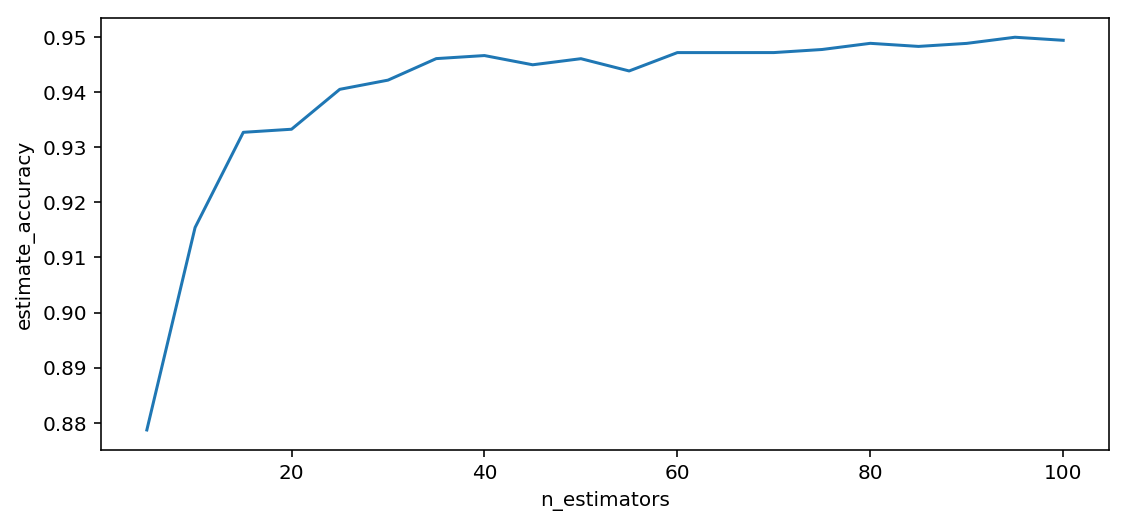

In [76]:
n_estimators_xx = []
n_estimators_yy = []

for i in range(5, 101, 5):
    n_estimators_xx.append(i)
    n_estimators_yy.append(test_random_forest(n_estimators=i))

plot_test_random_forest(np.array(n_estimators_xx), 
                        np.array(n_estimators_yy),
                        'n_estimators')    

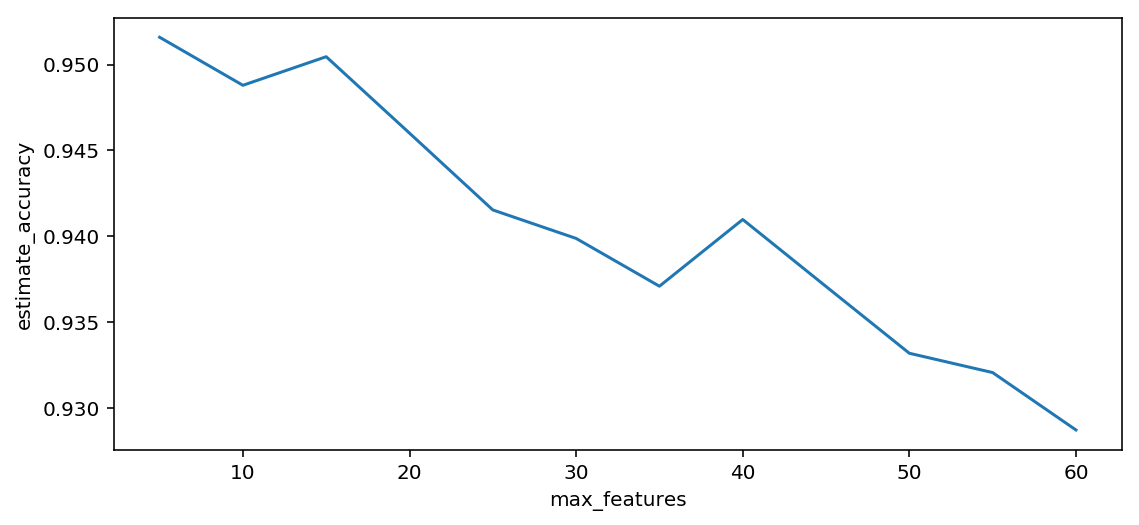

In [87]:
max_features_xx = []
max_features_yy = []

for i in range(5, d+1, 5):
    max_features_xx.append(i)
    max_features_yy.append(test_random_forest(max_features=i))

plot_test_random_forest(np.array(max_features_xx), 
                        np.array(max_features_yy),
                        'max_features')  

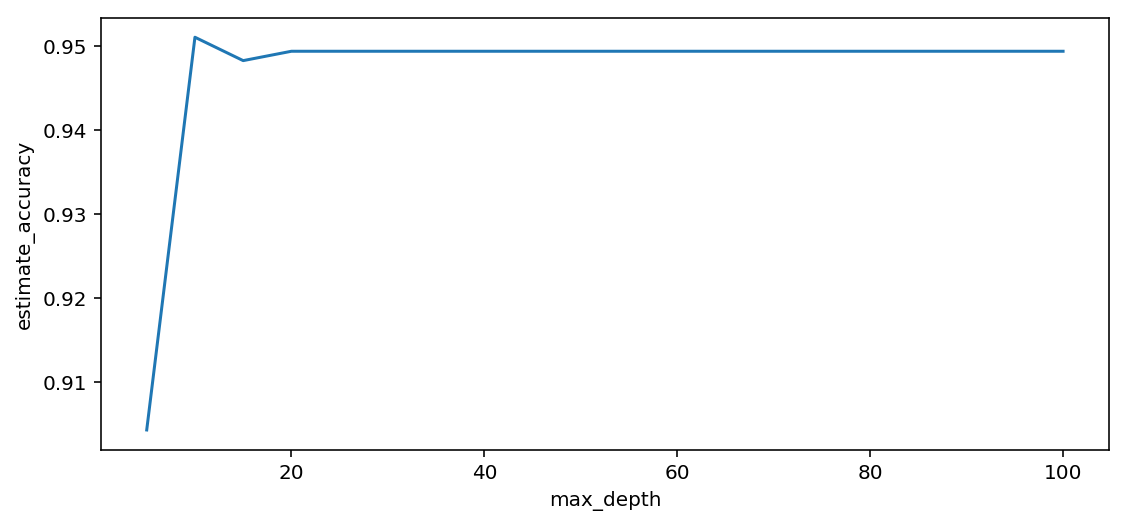

In [88]:
max_depth_xx = []
max_depth_yy = []

for i in range(5, 101, 5):
    max_depth_xx.append(i)
    max_depth_yy.append(test_random_forest(max_depth=i))

plot_test_random_forest(np.array(max_depth_xx), 
                        np.array(max_depth_yy),
                        'max_depth')  